In [27]:
import wandb
from math import isnan 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wandb
from tqdm import tqdm
from pathlib import Path
# from cycler import cycler
import matplotlib as mpl
from IPython.display import Markdown, display
import torch

def get_epoch(filename):
    return int(filename.split("_")[-1].split(".")[0])

api = wandb.Api()
project = "lora"
workspace = "username"
download = True

experiment_tags = [
    "all_layers_keys",
    "all_layers",
    "og_lora",  
    ]
kp=10
# get all runs that both: 1.  match any experiment tag and 2. are finished
runs = api.runs(f"{workspace}/{project}",
                 {"$and": [{"tags": {"$in": experiment_tags}},{"state": "finished"}]})

all_runs = []
run_counter = 0
for run in runs:
    #print(run.id)
    if run.state == "finished":
        run_dict = {'val_loss': run.summary['val_loss'], 'train_loss': run.summary['loss']}
        run_dict["r"] = run.config["lora_r"]
        if "all_layers_keys" in run.tags:
            params = run_dict["r"]*6227
            parametrization = "joint layers and qkvp"
        elif "all_layers" in run.tags:
            params = run_dict["r"]*18994
            parametrization = "joint layers"
        elif "og_lora" in run.tags:
            params = run_dict["r"]*524288
            parametrization = "matrix og"
        run_dict["params"] = params
        run_dict["parametrization"] = parametrization
        all_runs.append(run_dict)

In [30]:
df = pd.DataFrame(all_runs)

In [31]:
df.columns

Index(['val_loss', 'train_loss', 'r', 'params', 'parametrization'], dtype='object')

/home/chiche/miniconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chiche/miniconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chiche/miniconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chiche/miniconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

<Axes: xlabel='params', ylabel='val_loss'>

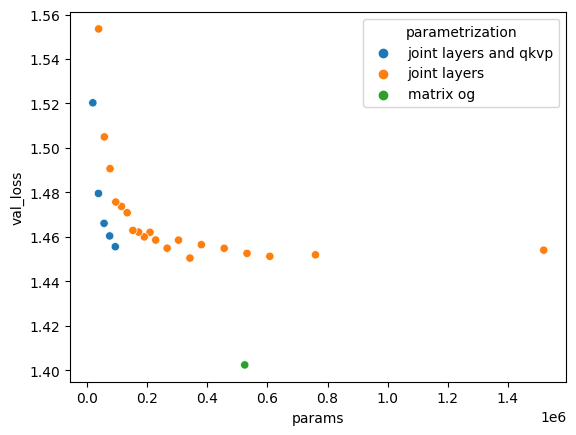

In [33]:
sns.scatterplot(df, x="params", y="val_loss", hue="parametrization")